In [1]:
import shutil
import os
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [2]:
if os.path.isdir("./Correlation_new"):
    shutil.rmtree("./Correlation_new")
    os.mkdir("./Correlation_new")
else:
    os.mkdir("./Correlation_new")

def is_h5(filename):
        return filename.endswith("h5")    

In [3]:
table = pd.read_hdf("./Processed_new/1.CD14_Monocytes.h5")
gene = table.index
del table
file_list = os.listdir("./Processed_new/")
h5_file = sorted(list(filter(is_h5, file_list)))

In [4]:
h5_file

['1.CD14_Monocytes.h5',
 '10.C_frozen_PBMCs.h5',
 '11.Data6k.h5',
 '12.Data8k.h5',
 '2.CD19_B_Cells.h5',
 '3.CD4+_CD25+_Regulatory_T_Cells_and_CD4+_T_Helper_Cells.h5',
 '4.CD4+_CD45RA+_CD25-Naive_T_Cells.h5',
 '5.CD4+_CD45RO+_Memory_T_Cells.h5',
 '6.CD56+_Natural_Killer_Cells.h5',
 '7.CD8+_CD45RA+_Naive_Cytotoxic_T_Cells.h5',
 '8.CD8+_Cytotoxic_T_Cells.h5',
 '9.A_frozen_PBMCs.h5']

CPU times: user 56min 52s, sys: 1min 37s, total: 58min 29s
Wall time: 58min 25s


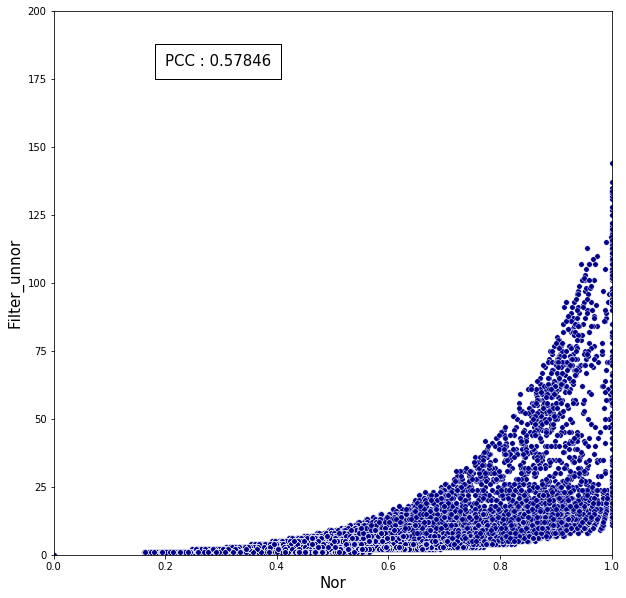

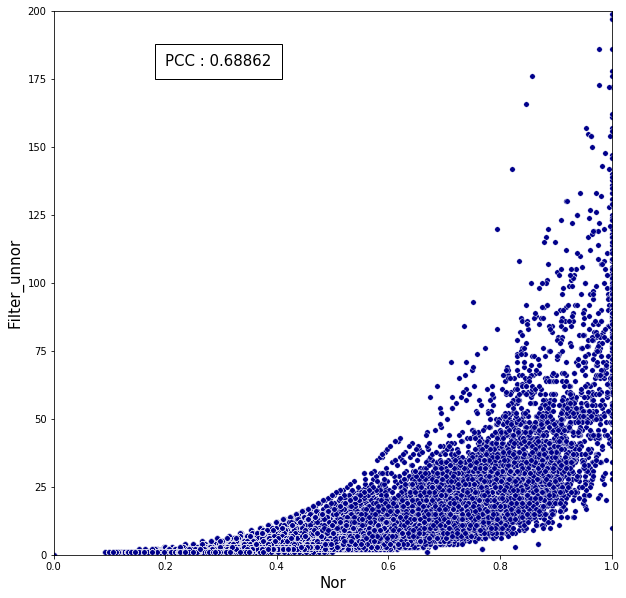

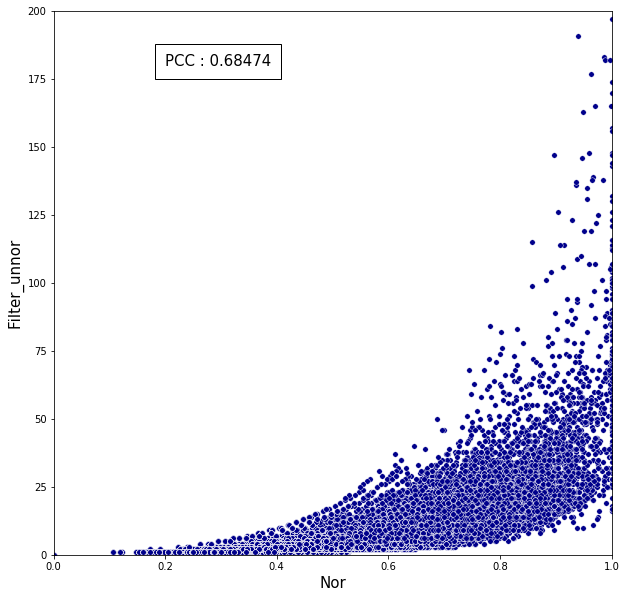

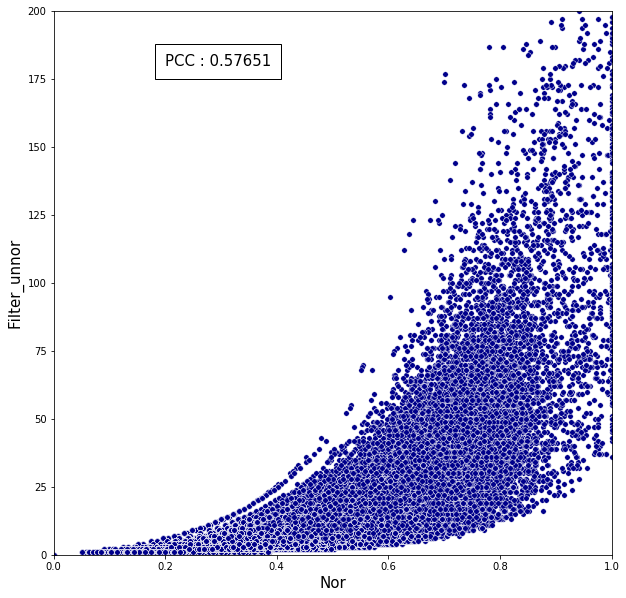

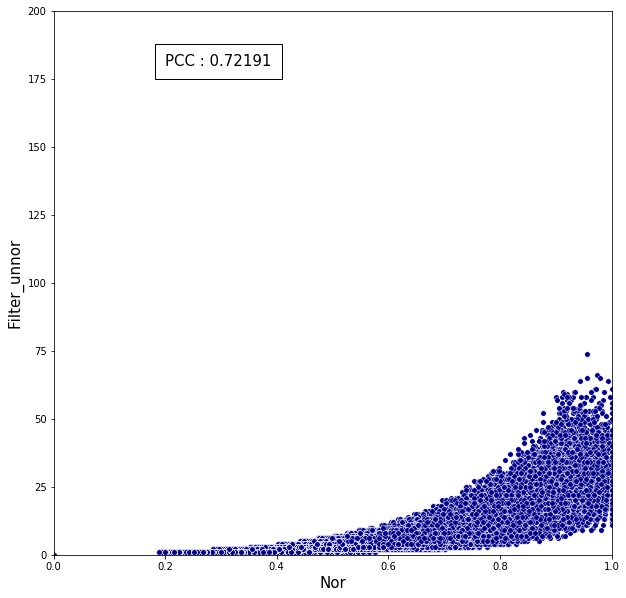

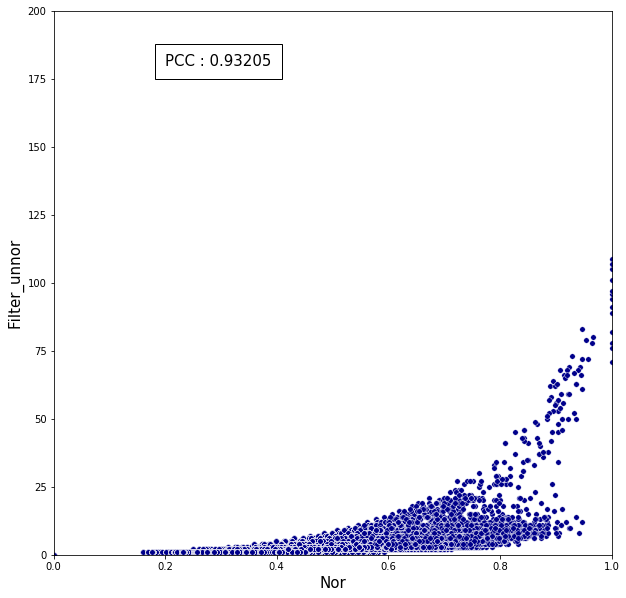

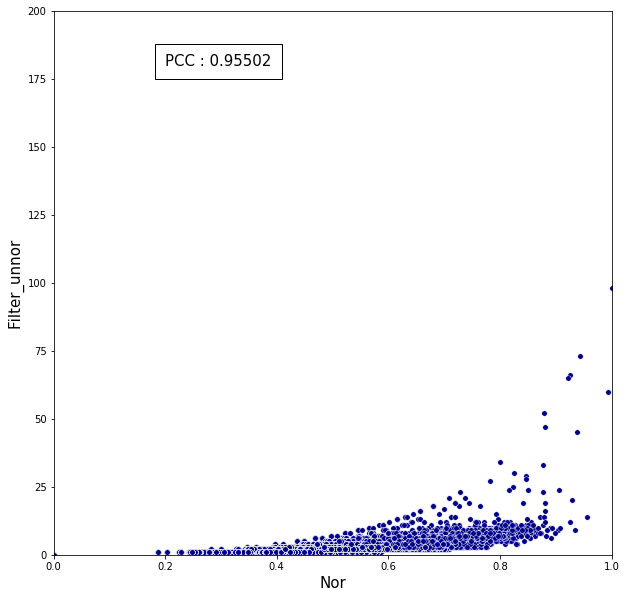

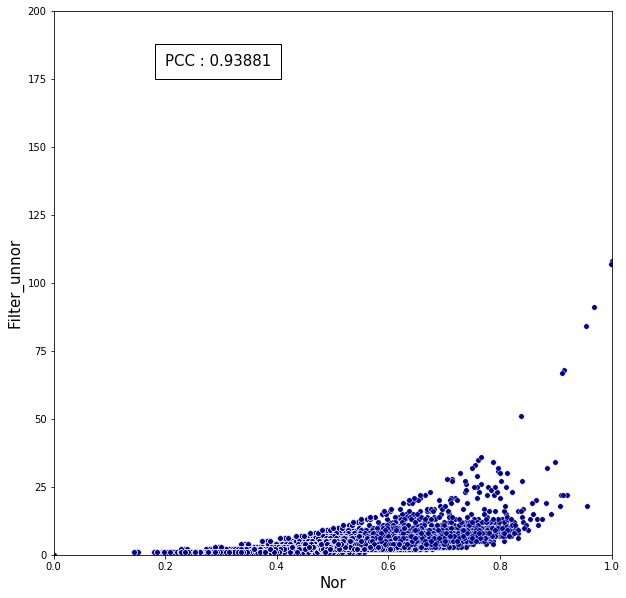

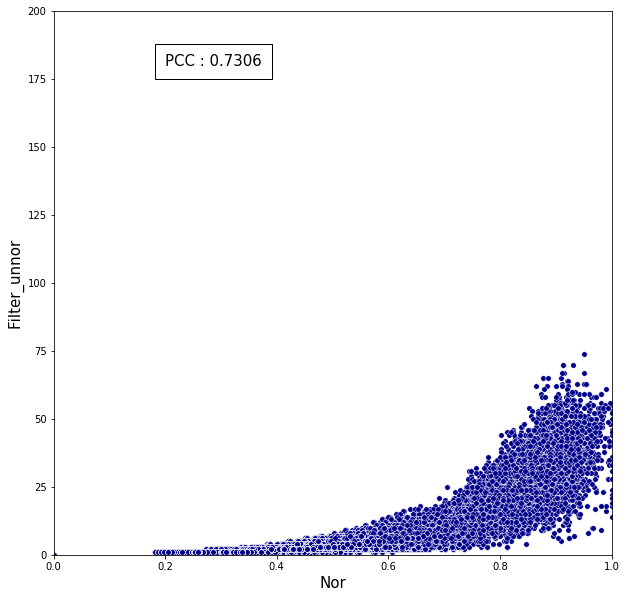

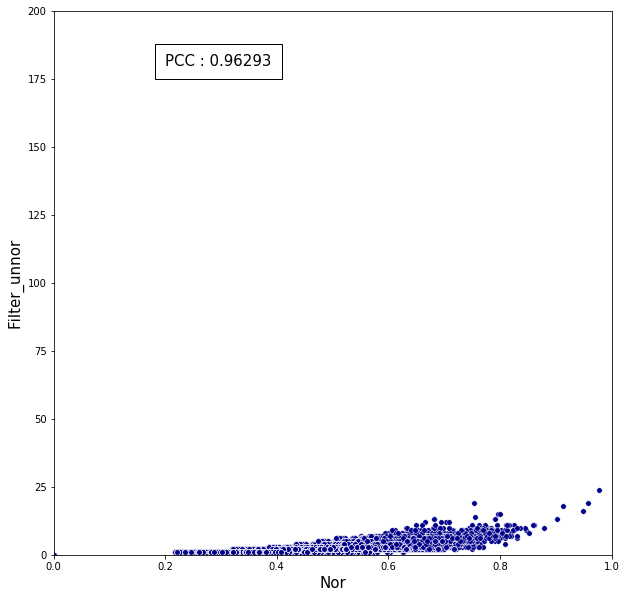

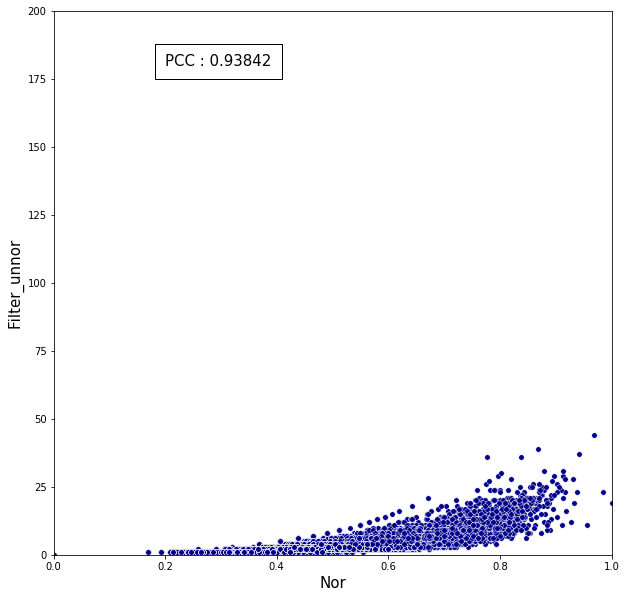

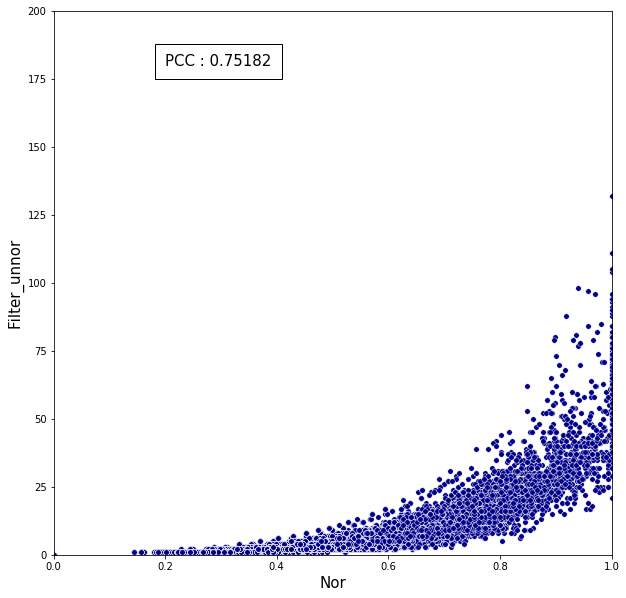

In [5]:
%%time
for i in h5_file:
    unnor = pd.read_hdf(str("./" + i))
    nor = pd.read_hdf(str("./Processed_new/" + i))
    filter_unnor = unnor.filter(items = gene.values.reshape(10708), axis = 0)
    filter_unnor = filter_unnor.sort_index()
    nor = nor.sort_index()
    
    #Flatten the dataframe in order to calculate the Pearson Correlation Coefficient(PCC)
    flatten_nor = nor.values.flatten("F")
    flatten_filter_unnor = filter_unnor.values.flatten("F")
    
    #Create a new dataframe contain the flatten real and cycle vaule
    corr = pd.DataFrame({"Nor": flatten_nor, "Filter_unnor": flatten_filter_unnor})
    
    #scRNA plot
    plt.figure(figsize = (10, 10))
    fig = sns.scatterplot(x = corr["Nor"], y = corr["Filter_unnor"], s = 30, color = "darkblue")
    fig.text(0.2, 180, 
             "PCC : " + str(round(pd.Series(flatten_filter_unnor).corr(pd.Series(flatten_nor)),5)), 
             fontsize = 15,
             bbox = {'facecolor': 'white', 'pad': 10})

    fig.set_xlabel("Nor", fontsize = 15)
    fig.set_ylabel("Filter_unnor", fontsize = 15)
    fig.set_xlim([0, 1])
    fig.set_ylim([0, 200])
    name = i
    fig.figure.savefig(str("./Correlation_new/" + name.rstrip("h5") + "png"))
    #fig.figure.savefig(str("./Correlation/" + name.rstrip("h5") + "pdf"))

In [6]:
gene.values.tolist()
with open ("./Processed_new/Filtered_gene_list.csv", "w") as outfile:
    outfile.write("{}, \n".format("Ensembl_id"))
    for i in sorted(gene.values.tolist()):
        outfile.write("{}, \n".format(i))